In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## Loading the Dataset

(In this section, you will load and prepare your data for training.)

In [2]:
data_test = pd.read_csv('/src/datasets/test.csv', sep=',')

In [3]:
data_train = pd.read_csv('/src/datasets/train.csv', sep=',')

## Training the Model

(This section covers creating and fitting the Isolation Forest model on your data.)

In [4]:
# create an instance of the IsolationForest model
clf = IsolationForest(random_state=16)
clf.fit(data_train)

,n_estimators,100
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,16
,verbose,0
,warm_start,False


## Visualizing the Decision Boundary

(Here you will plot the decision boundary of the model and visualize anomalies.)

In [17]:
# Set plot size
plt.rcParams['figure.figsize'] = (12, 12)

In [18]:
# Generate a mesh grid for the decision boundary
xx, yy = np.meshgrid(
    np.linspace(-2, 70, 200),
    np.linspace(-2, 70, 200)
)

In [19]:
# Evaluate decision function over the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


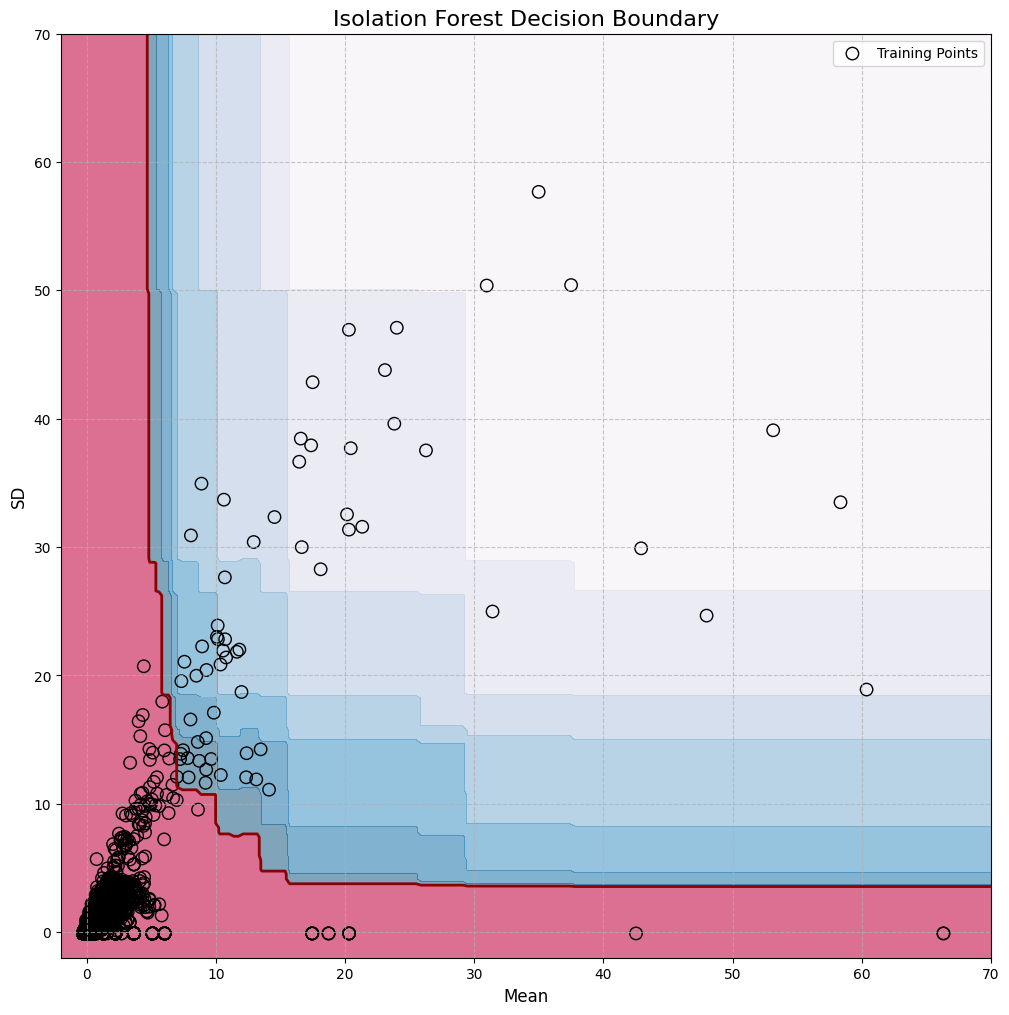

In [20]:
# Create the plot
plt.figure()
plt.title("Isolation Forest Decision Boundary", fontsize=16)

# Soft boundary regions (negative scores)
plt.contourf(xx, yy, Z, 
             levels=np.linspace(Z.min(), 0, 8), 
             cmap=plt.cm.PuBu, alpha=0.5)

# Hard boundary line (decision threshold)
plt.contour(xx, yy, Z, levels=[0], 
            linewidths=2, colors='darkred')

# Region inside the hard boundary (positive scores)
plt.contourf(xx, yy, Z, 
             levels=[0, Z.max()], 
             colors='palevioletred')

# Scatter plot of training data
plt.scatter(data_train.iloc[:, 0], data_train.iloc[:, 1],
            edgecolors='k', facecolors='none', s=80, label='Training Points')

# Labels and grid
plt.xlabel('Mean', fontsize=12)
plt.ylabel('SD', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


## Training the Model


In [16]:
# create an instance of the IsolationForest model, using contamination parameter
clf = IsolationForest(contamination=0.001)
clf.fit(data_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.001
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [22]:
test_predictions = clf.predict(data_test)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


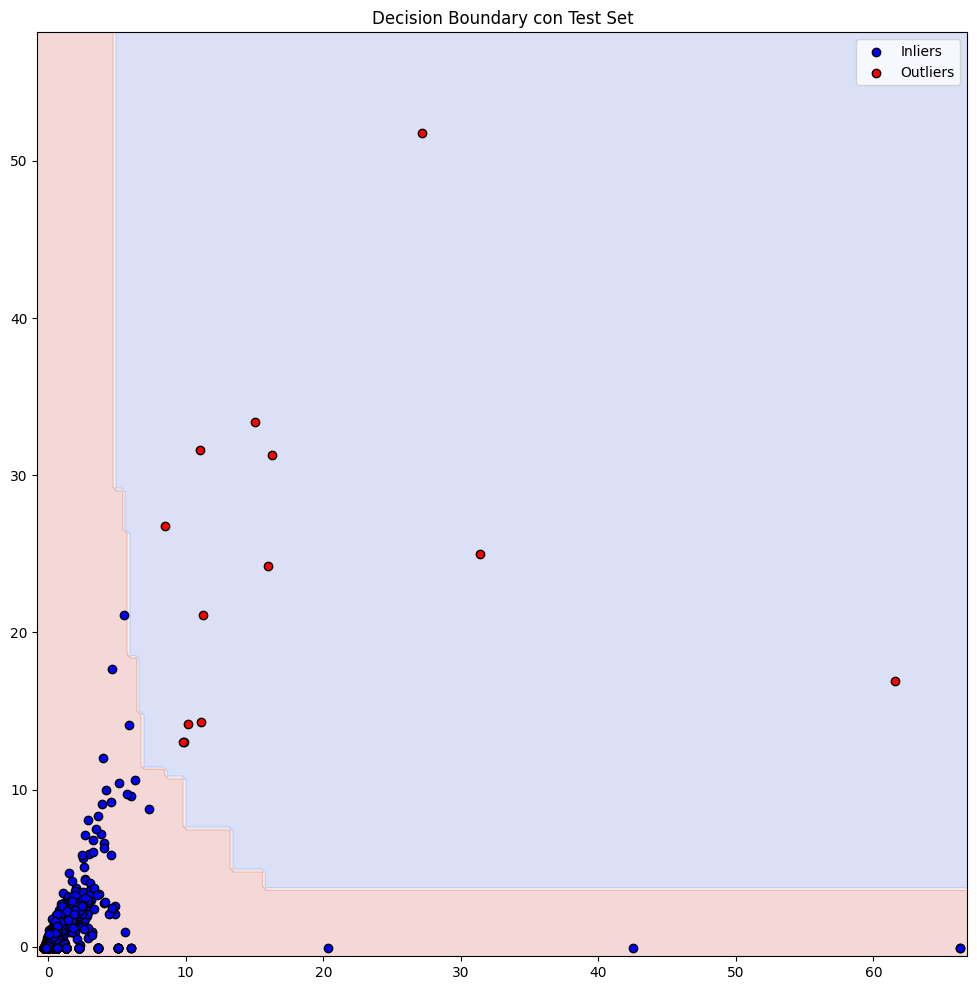

In [30]:
# Asegurarnos de usar valores numéricos para el modelo
X_test_values = data_test.values
X_train_values = data_train.values
feature_names = data_test.columns  # Nombres de las columnas originales

# Combinar dataset de prueba y predicciones
merged = pd.concat(
    [data_test.reset_index(drop=True),
     pd.Series(test_predictions, name='pred')],
    axis=1
)

# Crear rejilla para la frontera usando rango del train
x_min, x_max = X_train_values[:, 0].min() - 0.5, X_train_values[:, 0].max() + 0.5
y_min, y_max = X_train_values[:, 1].min() - 0.5, X_train_values[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Evaluar modelo en cada punto de la rejilla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)

# Dibujar inliers (pred = 1)
plt.scatter(
    merged.loc[merged['pred'] == 1, feature_names[0]],
    merged.loc[merged['pred'] == 1, feature_names[1]],
    c='blue', label='Inliers', edgecolor='k'
)

# Dibujar outliers (pred = -1)
plt.scatter(
    merged.loc[merged['pred'] == -1, feature_names[0]],
    merged.loc[merged['pred'] == -1, feature_names[1]],
    c='red', label='Outliers', edgecolor='k'
)

plt.legend()
plt.title("Decision Boundary con Test Set")
plt.savefig("decision_boundary.png", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
import joblib

# Save trained model to a file
joblib.dump(clf, "model.pkl")


['model.pkl']